In [1]:
import numpy as np
from scipy import stats
def load_embedding_dict(path_to_glove_file):
  embedding_dict = {}
  with open(path_to_glove_file, 'r') as f:
    for line in f:
      val = line.split()
      word = val[0]
      vector = np.asarray(val[1:], "float32")
      embedding_dict[word] = vector
  return embedding_dict

def weighted_vector(input, path):
  embedding_dict = load_embedding_dict(path)
  return sum(embedding_dict[w]* prob for w,prob in input)




In [2]:
embedding_dict = load_embedding_dict('glove.6B.300d.txt')

In [3]:
def weighted_vector(input, embedding_dict):
  return sum(embedding_dict[w]* prob for w,prob in input if w in embedding_dict)/sum( prob for w,prob in input if w in embedding_dict)

In [4]:
NUM_TOPICS = 20
NUM_WORDS = 10
import pickle
with open('topics_dic_'+str(NUM_TOPICS)+'_'+str(NUM_WORDS)+'.pkl','rb') as f:
    Input = pickle.load(f)

In [5]:
Input[1437]

[(0,
  [('actually', 0.03669041),
   ('leaky', 0.036554243),
   ('perception', 0.036554243),
   ('first', 0.024675718),
   ('numerical', 0.024675712),
   ('principle', 0.024675712),
   ('really', 0.024675703),
   ('pound', 0.024675697),
   ('psychological', 0.012650636),
   ('versus', 0.012638651)]),
 (1,
  [('study', 0.032240335),
   ('economics', 0.0295085),
   ('shock', 0.021732261),
   ('electric', 0.021732261),
   ('merely', 0.021732254),
   ('would', 0.021732248),
   ('people', 0.011150664),
   ('random', 0.011131015),
   ('nuzzle', 0.011131015),
   ('stops', 0.011131015)]),
 (2,
  [('economics', 0.028892929),
   ('try', 0.027604291),
   ('duration', 0.027579254),
   ('think', 0.0145815015),
   ('happiness', 0.014138662),
   ('silently', 0.014138662),
   ('life', 0.01413866),
   ('neoclassical', 0.01413866),
   ('engineering', 0.01413866),
   ('circumstances', 0.01413866)]),
 (3,
  [('something', 0.090621814),
   ('thing', 0.037911057),
   ('german', 0.03780935),
   ('actually', 

In [6]:
res1 = {}
for idx in Input.keys():
    cur_input = Input[idx]
    cur_matrix = np.zeros((NUM_TOPICS,300))
    for x,y in cur_input:
        temp = weighted_vector(y, embedding_dict)
        cur_matrix[x,:] = temp/np.linalg.norm(temp)
    res1[idx] = cur_matrix

In [7]:
def calculate_det(res1):
    div = {}
    for idx in res1.keys():
        u = res1[idx]
        div[idx] = np.linalg.det(np.dot(u,u.T)) 
    return div

In [8]:
diversity = calculate_det(res1)

In [9]:
def pol(coeff,x):
    ans = 0
    n= len(coeff)-1
    for i,c in enumerate(coeff):
        ans = ans + c* x**(n-i)
    return ans

In [10]:
diversity

{1437: 1.1299310928024474e-10,
 2880: 1.4176356388488678e-09,
 2658: 5.722061777082645e-12,
 1351: 4.0103443381852725e-10,
 49: 2.0209524623633052e-11,
 1345: 5.5038580751327174e-11,
 809: 1.9103719751595783e-10,
 2894: 2.514586949272052e-10,
 1423: 1.896150799028782e-07,
 2102: 8.545425971649494e-11,
 61: 2.1681299768121212e-11,
 821: 4.474598506473194e-09,
 2664: 5.502886691735165e-10,
 2670: 1.7953317757690913e-11,
 75: 9.93227341129534e-12,
 1379: 1.2737738274454913e-10,
 835: 6.552478196859545e-08,
 2116: 1.54288190973766e-08,
 606: 9.698211753233224e-10,
 2843: 5.39744130510753e-10,
 2857: 2.0705585801304243e-08,
 174: 5.6464900874813325e-12,
 148: 6.381283130273293e-07,
 1153: 4.438196412328011e-10,
 1621: 2.2544132066209078e-10,
 2328: 1.265365370276201e-09,
 1147: 2.3778987522932236e-10,
 2466: 1.3756913972215699e-09,
 1609: -4.695204111663288e-56,
 2300: 6.554042743440932e-10,
 2314: 2.914751800489279e-11,
 2472: 2.1733134467564013e-10,
 2499: 3.748791338247072e-09,
 1190: 4.

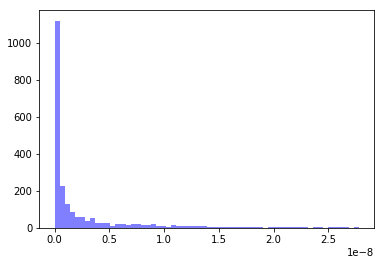

In [11]:
%matplotlib inline
a = sorted(diversity.values())
import matplotlib.pyplot as plt
num_bins = 60
n, bins, patches = plt.hist(a[:2200], num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [12]:
with open('../Data/all_features.pkl','rb') as f:
    all_df = pickle.load(f)

In [30]:
all_df.keys()

Index(['Video_ID', 'totalviews', 'total_count', 'beautiful', 'confusing',
       'courageous', 'fascinating', 'funny', 'informative', 'ingenious',
       'inspiring', 'jaw-dropping', 'longwinded', 'obnoxious', 'ok',
       'persuasive', 'unconvincing', 'doc_rep', 'Male', 'Female', 'Both',
       'Other', 'White', 'Black_or_African_American',
       'American_Indian_or_Alaska_Native', 'Asian',
       'Native_Hawaiian_or_Other_Pacific_Islander', 'Latino_or_Hispanic',
       'Other_or_mixed race'],
      dtype='object')

In [14]:
max(a[50:1050])

3.8321283016041576e-10

In [15]:
rating_names = ['beautiful', 'confusing', 'courageous', 'fascinating', 'funny', 'informative', 'ingenious', 'inspiring', 'jaw-dropping', 'longwinded', 'obnoxious', 'ok', 'persuasive', 'unconvincing']
pos_ratings = ['beautiful', 'courageous', 'fascinating', 'funny', 'informative', 'ingenious', 'inspiring', 'jaw-dropping']
neg_ratings = ['confusing', 'longwinded', 'obnoxious', 'ok', 'persuasive', 'unconvincing']

rat_dic = {}
for rat in rating_names:
    rat_dic[rat] = []
diversity_ar = []    
for i in range(all_df.shape[0]):
    doc_id = all_df['Video_ID'][i]
    divval = diversity[doc_id]
    if divval in a:
        #print(divval)
        diversity_ar.append(divval)
        for rat in rating_names:        
            rat_dic[rat].append(float(all_df[rat][i])/float(all_df['total_count'][i]))
num_bin = 10
lower_limit = 0
upper_limit = 2200
sorted_rating_dic = {}            
for rat_ind,rat in enumerate(pos_ratings):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))[lower_limit:upper_limit]
    h,e = np.histogram(rat_cur,bins=num_bin)
    div, rating = list(zip(*rat_cur))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    
    #print(mean_divs,mean_rates)
    plt.subplot(4,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    plt.plot(mean_divs,mean_rates,'-*')
    plt.title(rat)
    plt.tight_layout()
plt.savefig('Positive_ratings.pdf')
plt.close()


for rat_ind,rat in enumerate(neg_ratings):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))[lower_limit:upper_limit]
    h,e = np.histogram(rat_cur,bins=num_bin)
    div, rating = list(zip(*rat_cur))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    #print(mean_divs,mean_rates)
    plt.subplot(3,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    plt.plot(mean_divs,mean_rates,'-*')
    plt.title(rat)
    plt.tight_layout()
plt.savefig('Negative_ratings.pdf')
plt.close()




In [16]:
rat_dic = {}
for rat in rating_names:
    rat_dic[rat] = []
diversity_ar = []    
for i in range(all_df.shape[0]):
    doc_id = all_df['Video_ID'][i]
    divval = diversity[doc_id]
    if divval in a:
        #print(divval)
        diversity_ar.append(divval)
        for rat in rating_names:        
            rat_dic[rat].append(float(all_df[rat][i])/float(all_df['total_count'][i]))
#num_bin = 10

sorted_rating_dic = {}            
for rat_ind,rat in enumerate(rating_names):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))[lower_limit:upper_limit]
    h,e = np.histogram(rat_cur,bins=num_bin)
    div, rating = list(zip(*rat_cur))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    
    #print(mean_divs,mean_rates)
    #plt.subplot(4,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    plt.plot(mean_divs,mean_rates,'-*')
    plt.title(rat)
    plt.tight_layout()
    plt.savefig(rat+'.pdf')
    plt.close()


In [17]:
for rat in pos_ratings:
    
    plt.plot(diversity_ar,rat_dic[rat],'-.')
    plt.tight_layout()
    
plt.savefig('Positive_all.pdf')
plt.close()

for rat in neg_ratings:
    
    plt.plot(diversity_ar,rat_dic[rat],'-.')
    plt.tight_layout()
    
plt.savefig('Negative_all.pdf')
plt.close()


In [18]:

for rat_ind,rat in enumerate(pos_ratings):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))[lower_limit:upper_limit]
    h,e = np.histogram(rat_cur,bins=num_bin)
    div, rating = list(zip(*rat_cur))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    
    #print(mean_divs,mean_rates)
    #plt.subplot(4,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    plt.plot(mean_divs,mean_rates,'-*')
    #plt.title(rat)
    plt.tight_layout()
plt.savefig('Positive_all.pdf')
plt.close()


for rat_ind,rat in enumerate(neg_ratings):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))[lower_limit:upper_limit]
    h,e = np.histogram(rat_cur,bins=num_bin)
    div, rating = list(zip(*rat_cur))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    #print(mean_divs,mean_rates)
    #plt.subplot(3,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    plt.plot(mean_divs,mean_rates,'-*')
    #plt.title(rat)
    plt.tight_layout()
plt.savefig('Negative_all.pdf')
plt.close()


In [19]:
rat_dic = {}
for rat in rating_names:
    rat_dic[rat] = []
diversity_ar = []    
for i in range(all_df.shape[0]):
    doc_id = all_df['Video_ID'][i]
    divval = diversity[doc_id]
    if divval in a:
        #print(divval)
        diversity_ar.append(divval)
        for rat in rating_names:        
            rat_dic[rat].append(float(all_df[rat][i])/float(all_df['total_count'][i]))
#lower_limit = 0
num_bin = 40
deg = 2
sorted_rating_dic = {}            
for rat_ind,rat in enumerate(rating_names):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))#[lower_limit:upper_limit]
    #print(len(rat_cur))
    #outlier removal
    z = np.abs(stats.zscore(rat_cur))
    #print(z)
    rat_cur_o = np.array(rat_cur)[(z < 3).all(axis=1)]
    #rat_cur_o=np.sort(rat_cur_o)
    #print(rat_cur_o)
    h,e = np.histogram(rat_cur_o,bins=num_bin)
    div, rating = list(zip(*rat_cur_o))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    
    coeffs = np.polyfit(mean_divs, mean_rates, deg)
    predicted = [pol(coeffs,x) for x in mean_divs]
    
    #print(mean_divs,mean_rates)
    #plt.subplot(4,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    plt.plot(mean_divs,mean_rates,'g-*')
    plt.plot(mean_divs,predicted,'b-*')
    plt.title(rat)
    plt.tight_layout()
    plt.savefig(rat+'.pdf')
    plt.close()


In [20]:
pos_ratings_1 = ['beautiful', 'courageous', 'fascinating', 'funny']
pos_ratings_2 = ['informative', 'ingenious', 'inspiring', 'jaw-dropping']
neg_ratings = ['confusing', 'longwinded', 'obnoxious', 'ok', 'persuasive', 'unconvincing']



rat_dic = {}
for rat in rating_names:
    rat_dic[rat] = []
diversity_ar = []    
for i in range(all_df.shape[0]):
    doc_id = all_df['Video_ID'][i]
    divval = diversity[doc_id]
    if divval in a:
        #print(divval)
        diversity_ar.append(divval)
        for rat in rating_names:        
            rat_dic[rat].append(float(all_df[rat][i])/float(all_df['total_count'][i]))
#lower_limit = 0
num_bin = 30
deg = 2
sigma = 3
sorted_rating_dic = {} 
fig, axs = plt.subplots(2, 2)
for rat_ind,rat in enumerate(pos_ratings_1):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))#[lower_limit:upper_limit]
    #print(len(rat_cur))
    #outlier removal
    z = np.abs(stats.zscore(rat_cur))
    #print(z)
    rat_cur_o = np.array(rat_cur)[(z < sigma).all(axis=1)]
    #rat_cur_o=np.sort(rat_cur_o)
    #print(rat_cur_o)
    h,e = np.histogram(rat_cur_o,bins=num_bin)
    div, rating = list(zip(*rat_cur_o))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    
    coeffs = np.polyfit(mean_divs, mean_rates, deg)
    predicted = [pol(coeffs,x) for x in mean_divs]
    
    #print(mean_divs,mean_rates)
    #plt.subplot(4,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    #plt.subplot(2,2,rat_ind+1)
    ax=axs[int(rat_ind/2)][int(rat_ind%2)]
    ax.plot(mean_divs,mean_rates,'g-*')
    ax.plot(mean_divs,predicted,'b-*')
    ax.set_title(rat)
    #ax.set_tight_layout()
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Positive1.pdf')
plt.close()


fig, axs = plt.subplots(2, 2)
for rat_ind,rat in enumerate(pos_ratings_2):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))#[lower_limit:upper_limit]
    #print(len(rat_cur))
    #outlier removal
    z = np.abs(stats.zscore(rat_cur))
    #print(z)
    rat_cur_o = np.array(rat_cur)[(z < sigma).all(axis=1)]
    #rat_cur_o=np.sort(rat_cur_o)
    #print(rat_cur_o)
    h,e = np.histogram(rat_cur_o,bins=num_bin)
    div, rating = list(zip(*rat_cur_o))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    
    coeffs = np.polyfit(mean_divs, mean_rates, deg)
    predicted = [pol(coeffs,x) for x in mean_divs]
    
    #print(mean_divs,mean_rates)
    #plt.subplot(4,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    ax=axs[int(rat_ind%2)][int(rat_ind/2)]
    ax.plot(mean_divs,mean_rates,'g-*')
    ax.plot(mean_divs,predicted,'b-*')
    ax.set_title(rat)
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Positive2.pdf')
plt.close()





fig, axs = plt.subplots(2, 3)
for rat_ind,rat in enumerate(neg_ratings):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))#[lower_limit:upper_limit]
    #print(len(rat_cur))
    #outlier removal
    z = np.abs(stats.zscore(rat_cur))
    #print(z)
    rat_cur_o = np.array(rat_cur)[(z < sigma).all(axis=1)]
    #rat_cur_o=np.sort(rat_cur_o)
    #print(rat_cur_o)
    h,e = np.histogram(rat_cur_o,bins=num_bin)
    div, rating = list(zip(*rat_cur_o))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    
    coeffs = np.polyfit(mean_divs, mean_rates, deg)
    predicted = [pol(coeffs,x) for x in mean_divs]
    
    #print(mean_divs,mean_rates)
    #plt.subplot(4,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    #ax.subplot(2,3,rat_ind+1)
    ax=axs[int(rat_ind/3)][int(rat_ind%3)]
    ax.plot(mean_divs,mean_rates,'g-*')
    ax.plot(mean_divs,predicted,'b-*')
    ax.set_title(rat)
    #plt.tight_layout()
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Negative.pdf')
plt.close()






In [29]:
pos_ratings_1 = ['beautiful', 'courageous', 'fascinating', 'funny']
pos_ratings_2 = ['informative', 'ingenious', 'inspiring', 'jaw-dropping']
neg_ratings = ['confusing', 'longwinded', 'obnoxious', 'ok', 'persuasive', 'unconvincing']



rat_dic = {}
for rat in rating_names:
    rat_dic[rat] = []
diversity_ar = []    
for i in range(all_df.shape[0]):
    doc_id = all_df['Video_ID'][i]
    divval = diversity[doc_id]
    if divval in a:
        #print(divval)
        diversity_ar.append(divval)
        for rat in rating_names:        
            rat_dic[rat].append(float(all_df[rat][i])/float(all_df['total_count'][i]))
#lower_limit = 0
num_bin = 10
deg = 2
sigma = 3
sorted_rating_dic = {} 
fig, axs = plt.subplots(2, 2)
for rat_ind,rat in enumerate(pos_ratings_1):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))#[lower_limit:upper_limit]
    #print(len(rat_cur))
    #outlier removal
    z = np.abs(stats.zscore(rat_cur))
    #print(z)
    rat_cur_o = np.array(rat_cur)[(z < sigma).all(axis=1)]
    #rat_cur_o=np.sort(rat_cur_o)
    #print(rat_cur_o)
    h,e = np.histogram(rat_cur_o,bins=num_bin)
    div, rating = list(zip(*rat_cur_o))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    
    #mean_divs = np.log10(np.array(mean_divs)+0.00001)
    coeffs = np.polyfit(mean_divs, mean_rates, deg)
    predicted = [pol(coeffs,x) for x in mean_divs]
    
    #print(mean_divs,mean_rates)
    #plt.subplot(4,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    #plt.subplot(2,2,rat_ind+1)
    
    ax=axs[int(rat_ind/2)][int(rat_ind%2)]
    ax.plot(mean_divs,mean_rates,'g-*')
    ax.plot(mean_divs,predicted,'b-*')
    ax.set_title(rat)
    #ax.set_tight_layout()
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Positive1.pdf')
plt.close()


fig, axs = plt.subplots(2, 2)
for rat_ind,rat in enumerate(pos_ratings_2):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))#[lower_limit:upper_limit]
    #print(len(rat_cur))
    #outlier removal
    z = np.abs(stats.zscore(rat_cur))
    #print(z)
    rat_cur_o = np.array(rat_cur)[(z < sigma).all(axis=1)]
    #rat_cur_o=np.sort(rat_cur_o)
    #print(rat_cur_o)
    h,e = np.histogram(rat_cur_o,bins=num_bin)
    div, rating = list(zip(*rat_cur_o))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    
    #mean_divs = np.log10(np.array(mean_divs)+0.00001)
    coeffs = np.polyfit(mean_divs, mean_rates, deg)
    predicted = [pol(coeffs,x) for x in mean_divs]
    
    #print(mean_divs,mean_rates)
    #plt.subplot(4,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    
    ax=axs[int(rat_ind%2)][int(rat_ind/2)]
    ax.plot(mean_divs,mean_rates,'g-*')
    ax.plot(mean_divs,predicted,'b-*')
    ax.set_title(rat)
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Positive2.pdf')
plt.close()





fig, axs = plt.subplots(2, 3)
for rat_ind,rat in enumerate(neg_ratings):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))#[lower_limit:upper_limit]
    #print(len(rat_cur))
    #outlier removal
    z = np.abs(stats.zscore(rat_cur))
    #print(z)
    rat_cur_o = np.array(rat_cur)[(z < sigma).all(axis=1)]
    #rat_cur_o=np.sort(rat_cur_o)
    #print(rat_cur_o)
    h,e = np.histogram(rat_cur_o,bins=num_bin)
    div, rating = list(zip(*rat_cur_o))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    
    #mean_divs = np.log10(np.array(mean_divs)+0.00001)
    coeffs = np.polyfit(mean_divs, mean_rates, deg)
    predicted = [pol(coeffs,x) for x in mean_divs]
    
    #print(mean_divs,mean_rates)
    #plt.subplot(4,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    #ax.subplot(2,3,rat_ind+1)
    
    ax=axs[int(rat_ind/3)][int(rat_ind%3)]
    ax.plot(mean_divs,mean_rates,'g-*')
    ax.plot(mean_divs,predicted,'b-*')
    ax.set_title(rat)
    #plt.tight_layout()
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Negative.pdf')
plt.close()






In [28]:
pos_ratings_1 = ['beautiful', 'courageous', 'fascinating', 'funny']
pos_ratings_2 = ['informative', 'ingenious', 'inspiring', 'jaw-dropping']
neg_ratings = ['confusing', 'longwinded', 'obnoxious', 'ok', 'persuasive', 'unconvincing']



rat_dic = {}
for rat in rating_names:
    rat_dic[rat] = []
diversity_ar = []    
for i in range(all_df.shape[0]):
    doc_id = all_df['Video_ID'][i]
    divval = diversity[doc_id]
    if divval in a:
        #print(divval)
        diversity_ar.append(divval)
        for rat in rating_names:        
            rat_dic[rat].append(float(all_df[rat][i])/float(all_df['total_count'][i]))
#lower_limit = 0
num_bin = 4
deg = 1
sigma = 3
sorted_rating_dic = {} 
fig, axs = plt.subplots(2, 2)
for rat_ind,rat in enumerate(pos_ratings_1):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))#[lower_limit:upper_limit]
    #print(len(rat_cur))
    #outlier removal
    z = np.abs(stats.zscore(rat_cur))
    #print(z)
    rat_cur_o = np.array(rat_cur)[(z < sigma).all(axis=1)]
    #rat_cur_o=np.sort(rat_cur_o)
    #print(rat_cur_o)
    h,e = np.histogram(rat_cur_o,bins=num_bin)
    div, rating = list(zip(*rat_cur_o))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    corr = str(np.corrcoef(div,rating)[0][1])
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    
    #mean_divs = np.log10(np.array(mean_divs)+0.00001)
#     coeffs = np.polyfit(mean_divs, mean_rates, deg)
#     predicted = [pol(coeffs,x) for x in mean_divs]
    corr = str(np.corrcoef(mean_divs,mean_rates)[0][1])
    #print(mean_divs,mean_rates)
    #plt.subplot(4,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    #plt.subplot(2,2,rat_ind+1)
    
    ax=axs[int(rat_ind/2)][int(rat_ind%2)]
    ax.plot(mean_divs,mean_rates,'g-*',label=corr)
    ax.legend()
    #ax.plot(mean_divs,predicted,'b-*')
    ax.set_title(rat)
    #ax.set_tight_layout()
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Positive1.pdf')
plt.close()


fig, axs = plt.subplots(2, 2)
for rat_ind,rat in enumerate(pos_ratings_2):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))#[lower_limit:upper_limit]
    #print(len(rat_cur))
    #outlier removal
    z = np.abs(stats.zscore(rat_cur))
    #print(z)
    rat_cur_o = np.array(rat_cur)[(z < sigma).all(axis=1)]
    #rat_cur_o=np.sort(rat_cur_o)
    #print(rat_cur_o)
    h,e = np.histogram(rat_cur_o,bins=num_bin)
    div, rating = list(zip(*rat_cur_o))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    corr = str(np.corrcoef(div,rating)[0][1])
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    
    #mean_divs = np.log10(np.array(mean_divs)+0.00001)
#     coeffs = np.polyfit(mean_divs, mean_rates, deg)
#     predicted = [pol(coeffs,x) for x in mean_divs]
    
    #print(mean_divs,mean_rates)
    #plt.subplot(4,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    #corr = str(np.corrcoef(mean_divs,mean_rates)[0][1])
    
    ax=axs[int(rat_ind%2)][int(rat_ind/2)]
    ax.plot(mean_divs,mean_rates,'g-*',label=corr)
    ax.legend()
#     ax.plot(mean_divs,predicted,'b-*')
    ax.set_title(rat)
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Positive2.pdf')
plt.close()





fig, axs = plt.subplots(2, 3)
for rat_ind,rat in enumerate(neg_ratings):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))#[lower_limit:upper_limit]
    #print(len(rat_cur))
    #outlier removal
    z = np.abs(stats.zscore(rat_cur))
    #print(z)
    rat_cur_o = np.array(rat_cur)[(z < sigma).all(axis=1)]
    #rat_cur_o=np.sort(rat_cur_o)
    #print(rat_cur_o)
    h,e = np.histogram(rat_cur_o,bins=num_bin)
    div, rating = list(zip(*rat_cur_o))
    corr = str(np.corrcoef(div,rating)[0][1])
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    
    #mean_divs = np.log10(np.array(mean_divs)+0.00001)
#     coeffs = np.polyfit(mean_divs, mean_rates, deg)
#     predicted = [pol(coeffs,x) for x in mean_divs]
    
    #print(mean_divs,mean_rates)
    #plt.subplot(4,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    #ax.subplot(2,3,rat_ind+1)
    
    
    ax=axs[int(rat_ind/3)][int(rat_ind%3)]
    ax.plot(mean_divs,mean_rates,'g-*',label=corr)
    ax.legend()
    #ax.plot(mean_divs,predicted,'b-*')
    ax.set_title(rat)
    #plt.tight_layout()
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Negative.pdf')
plt.close()






In [53]:
def remove_ol_and_do_binning(rc,dl,num_bin,sigma):
    
    #creating zipped list and removing outlier
    rat_cur = sorted(list(zip(dl,rc)))#[lower_limit:upper_limit]
    #print(rat_cur)
    z = np.abs(stats.zscore(rat_cur))
    rat_cur_o = np.array(rat_cur)[(z < sigma).all(axis=1)]
   
    h,e = np.histogram(rat_cur_o,bins=num_bin)
    div, rating = list(zip(*rat_cur_o))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    print(div_ar)
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    return mean_divs, mean_rates

In [55]:
pos_ratings_1 = ['beautiful', 'courageous', 'fascinating', 'funny']
pos_ratings_2 = ['informative', 'ingenious', 'inspiring', 'jaw-dropping']
neg_ratings = ['confusing', 'longwinded', 'obnoxious', 'ok', 'persuasive', 'unconvincing']



male_rat_dic = {}
for rat in rating_names:
    male_rat_dic[rat] = []

other_rat_dic = {}
for rat in rating_names:
    other_rat_dic[rat] = []
    
    
male_diversity_ar = [] 
other_diversity_ar = []
for i in range(all_df.shape[0]):
    doc_id = all_df['Video_ID'][i]
    divval = diversity[doc_id]
#     if divval in a:
#         #print(divval)
#         diversity_ar.append(divval)
    if int(all_df['Male'][i]) == 1:
        male_diversity_ar.append(divval)
        for rat in rating_names:  
            male_rat_dic[rat].append(float(all_df[rat][i])/float(all_df['total_count'][i]))
    else:
        other_diversity_ar.append(divval)
        for rat in rating_names:  
            other_rat_dic[rat].append(float(all_df[rat][i])/float(all_df['total_count'][i]))
          
        
#lower_limit = 0
num_bin = 20
deg = 1
sigma = 3
sorted_rating_dic = {} 
fig, axs = plt.subplots(2, 2)
for rat_ind,rat in enumerate(pos_ratings_1):
    

    male_mean_divs, male_mean_rates = remove_ol_and_do_binning(male_rat_dic[rat],male_diversity_ar,num_bin,sigma)
    other_mean_divs, other_mean_rates = remove_ol_and_do_binning(other_rat_dic[rat],other_diversity_ar,num_bin,sigma)
    print(len(male_mean_divs),len(other_mean_divs))
    ax=axs[int(rat_ind/2)][int(rat_ind%2)]
    ax.plot(male_mean_divs,male_mean_rates,'g-*')
    ax.plot(other_mean_divs,other_mean_rates,'b-*',label=corr)
    #ax.legend()
    #ax.plot(mean_divs,predicted,'b-*')
    ax.set_title(rat)
    #ax.set_tight_layout()
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Positive1.pdf')
plt.close()


fig, axs = plt.subplots(2, 2)
for rat_ind,rat in enumerate(pos_ratings_2):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))#[lower_limit:upper_limit]
    #print(len(rat_cur))
    #outlier removal
    z = np.abs(stats.zscore(rat_cur))
    #print(z)
    rat_cur_o = np.array(rat_cur)[(z < sigma).all(axis=1)]
    #rat_cur_o=np.sort(rat_cur_o)
    #print(rat_cur_o)
    h,e = np.histogram(rat_cur_o,bins=num_bin)
    div, rating = list(zip(*rat_cur_o))
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    corr = str(np.corrcoef(div,rating)[0][1])
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    
    #mean_divs = np.log10(np.array(mean_divs)+0.00001)
#     coeffs = np.polyfit(mean_divs, mean_rates, deg)
#     predicted = [pol(coeffs,x) for x in mean_divs]
    
    #print(mean_divs,mean_rates)
    #plt.subplot(4,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    #corr = str(np.corrcoef(mean_divs,mean_rates)[0][1])
    
    ax=axs[int(rat_ind%2)][int(rat_ind/2)]
    ax.plot(mean_divs,mean_rates,'g-*',label=corr)
    ax.legend()
#     ax.plot(mean_divs,predicted,'b-*')
    ax.set_title(rat)
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Positive2.pdf')
plt.close()





fig, axs = plt.subplots(2, 3)
for rat_ind,rat in enumerate(neg_ratings):
    rat_cur = sorted(list(zip(diversity_ar,rat_dic[rat])))#[lower_limit:upper_limit]
    #print(len(rat_cur))
    #outlier removal
    z = np.abs(stats.zscore(rat_cur))
    #print(z)
    rat_cur_o = np.array(rat_cur)[(z < sigma).all(axis=1)]
    #rat_cur_o=np.sort(rat_cur_o)
    #print(rat_cur_o)
    h,e = np.histogram(rat_cur_o,bins=num_bin)
    div, rating = list(zip(*rat_cur_o))
    corr = str(np.corrcoef(div,rating)[0][1])
    n = len(div)
    min_div, max_div = min(div), max(div)
    div_ar, rating_ar = [[] for x in range(num_bin)], [[] for x in range(num_bin)]
    division = np.linspace(min_div,max_div,num_bin)
    cur_next = 1
    for i in range(n):
        if div[i] <= division[cur_next]:
            div_ar[cur_next-1].append(div[i])
            rating_ar[cur_next-1].append(rating[i])
        else:
            cur_next = cur_next+1
    new_div_ar, new_rating_ar = [], []
    for k in range(num_bin):
        if div_ar[k] and rating_ar[k]:
            new_div_ar.append(np.array(div_ar[k]))
            new_rating_ar.append(np.array(rating_ar[k]))
    #div_ar, rating_ar = [np.array(divs) for divs in div_ar], [np.array(rates) for rates in rating_ar]
    mean_divs, mean_rates = [divs.mean() for divs in new_div_ar], [rates.mean() for rates in new_rating_ar]
    std_divs, std_rates = [np.std(divs) for divs in new_div_ar], [np.std(rates) for rates in new_rating_ar]
    
    #mean_divs = np.log10(np.array(mean_divs)+0.00001)
#     coeffs = np.polyfit(mean_divs, mean_rates, deg)
#     predicted = [pol(coeffs,x) for x in mean_divs]
    
    #print(mean_divs,mean_rates)
    #plt.subplot(4,2,rat_ind+1)
    #plt.errorbar(mean_divs,mean_rates,yerr = std_rates)
    #ax.subplot(2,3,rat_ind+1)
    
    
    ax=axs[int(rat_ind/3)][int(rat_ind%3)]
    ax.plot(mean_divs,mean_rates,'g-*',label=corr)
    ax.legend()
    #ax.plot(mean_divs,predicted,'b-*')
    ax.set_title(rat)
    #plt.tight_layout()
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Negative.pdf')
plt.close()






[[-1.8980933541884182e-25, -2.7518433127922175e-26, -4.695204111663288e-56, -2.845244647401395e-109, 9.308358621255802e-105, 4.289291645291581e-72, 1.59502383201053e-39, 1.2047044518280932e-24, 1.6173380028124787e-24, 1.08569746338728e-13, 1.2160177540175047e-13, 1.9182018283924626e-13, 2.5830291814255856e-13, 3.50698467256859e-13, 4.3447077155987156e-13, 5.676053435804265e-13, 6.625810094423474e-13, 7.598635569572538e-13, 7.645947648643144e-13, 1.1969682329792991e-12, 1.4564875118185996e-12, 1.5340399540433719e-12, 1.5621430022810953e-12, 1.575586816693346e-12, 1.611005296520519e-12, 1.6354888589021645e-12, 1.6749533477992783e-12, 2.2444615499347262e-12, 2.2588621693670127e-12, 2.4552029931438594e-12, 3.4492035218619642e-12, 3.4595549142332036e-12, 3.5955447319228686e-12, 3.6425268437189894e-12, 3.665543074659402e-12, 3.818723378328844e-12, 3.8510562633088795e-12, 4.303123550024849e-12, 5.288525440325304e-12, 5.4789097809771045e-12, 5.722061777082645e-12, 5.726640912492686e-12, 5.8281